# 428_ra236.530_dec-46.922_4U1543

In [73]:
from pathlib import Path
import numpy as np
import arviz as az
import graphviz as gv
import utility_functions as ufn
import importlib

importlib.reload(ufn)
az.style.use("arviz-white")

RANDOM_SEED = 2023-10-10
rng = np.random.default_rng(RANDOM_SEED)

OVERWRITE_TRACES = False

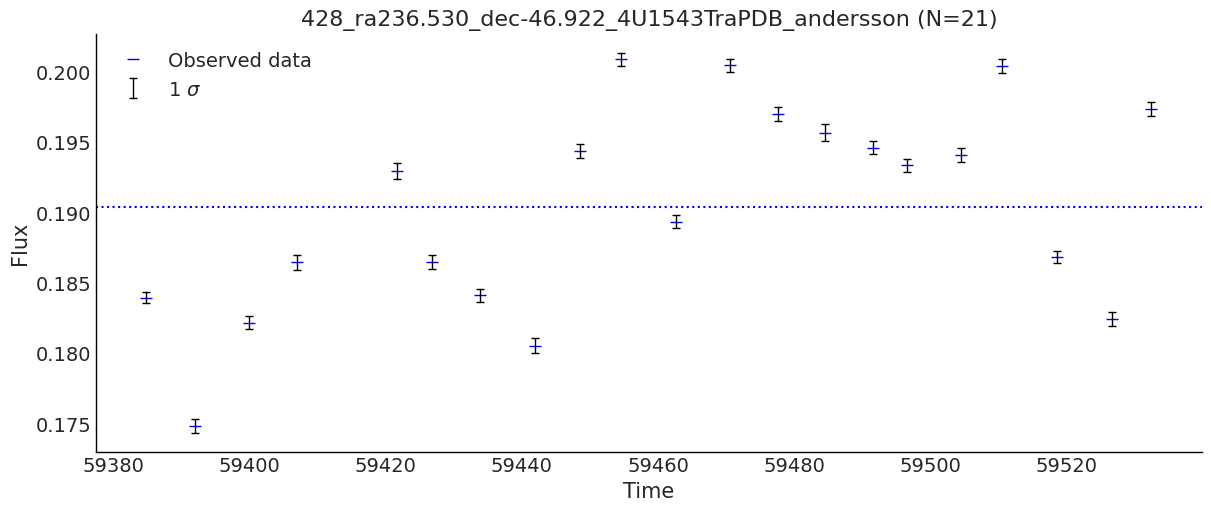

In [74]:
# File paths to CSVs of flux density observations.
csv_paths_list = sorted(list(Path('data_raw').iterdir()))
csv_path = csv_paths_list[1]
ufn.plot_lc(csv_path)

## SE Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN},i} \sim \textrm{HalfNormal}(e_i^2)$$

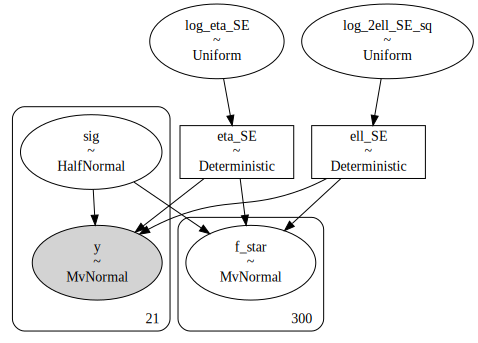

In [75]:
se_trace_path = Path(f"traces/{csv_path.stem}_se_idata.nc")
se_dag_path = Path(f'dags/{csv_path.stem}_se_dag.dot')

if se_trace_path.is_file() and not OVERWRITE_TRACES:
    se_trace = az.from_netcdf(se_trace_path)
    se_dag = gv.Source.from_file(se_dag_path)
else:
    se_trace, se_dag = ufn.fit_se_gp(csv_path, rng_seed=rng);
    az.to_netcdf(se_trace, se_trace_path)
    with open(se_dag_path, 'w') as writehandle:
        writehandle.write(se_dag.source)

gv.Source(se_dag.source)

In [76]:
variable_names = ["log_2ell_SE_sq", "log_eta_SE", "ell_SE", "eta_SE"]
ufn.print_post_summary(se_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq   5.708213  0.074013   5.591935   5.810680     0.002705   
log_eta_SE      -1.985281  0.125711  -2.163670  -1.781603     0.004204   
ell_SE          12.274612  0.455371  11.581324  12.919869     0.016598   
eta_SE           0.137342  0.017019   0.114903   0.168368     0.000578   

                 ess_median     ess_tail     r_hat       mean        sd  
log_2ell_SE_sq  4039.561904  2774.231238  1.000082   5.701360  0.108612  
log_eta_SE      3717.794489  2686.661863  1.002274  -1.974191  0.193141  
ell_SE          4039.561904  2774.231238  1.000132  12.250580  0.660534  
eta_SE          3717.794489  2686.661863  1.002296   0.141561  0.028832

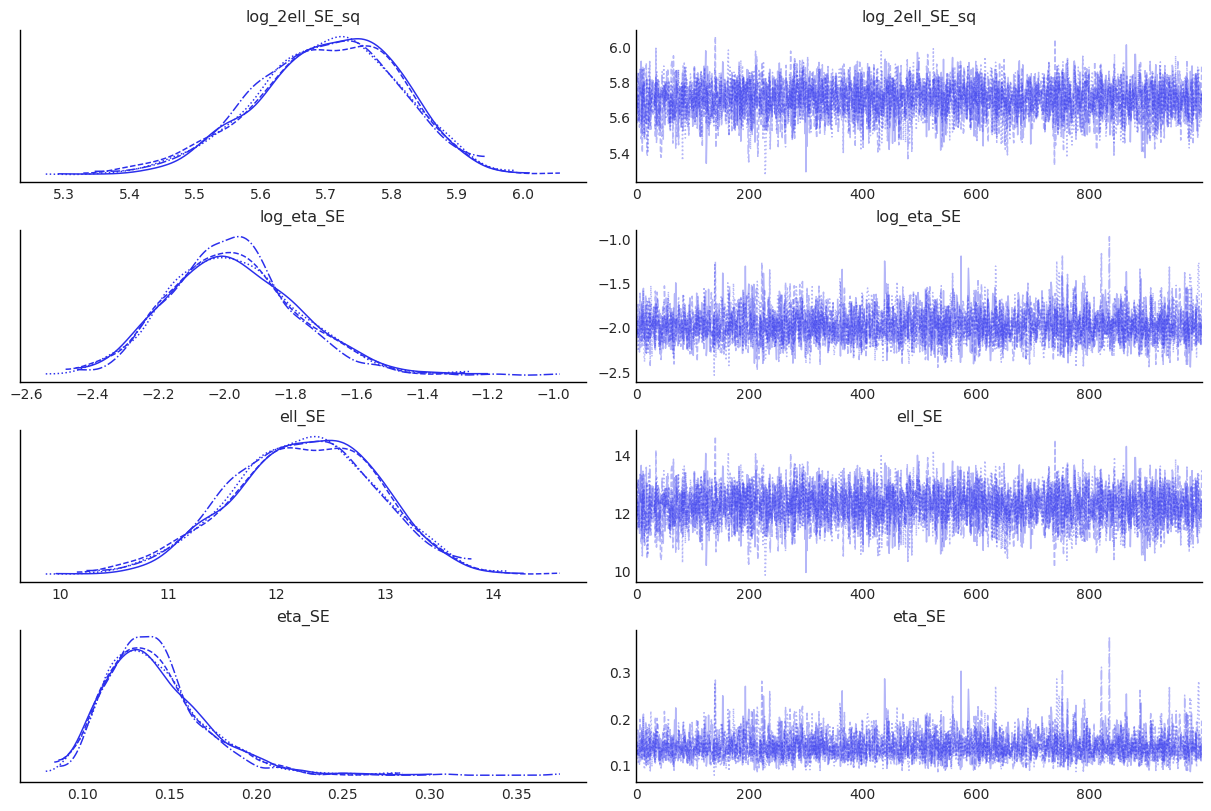

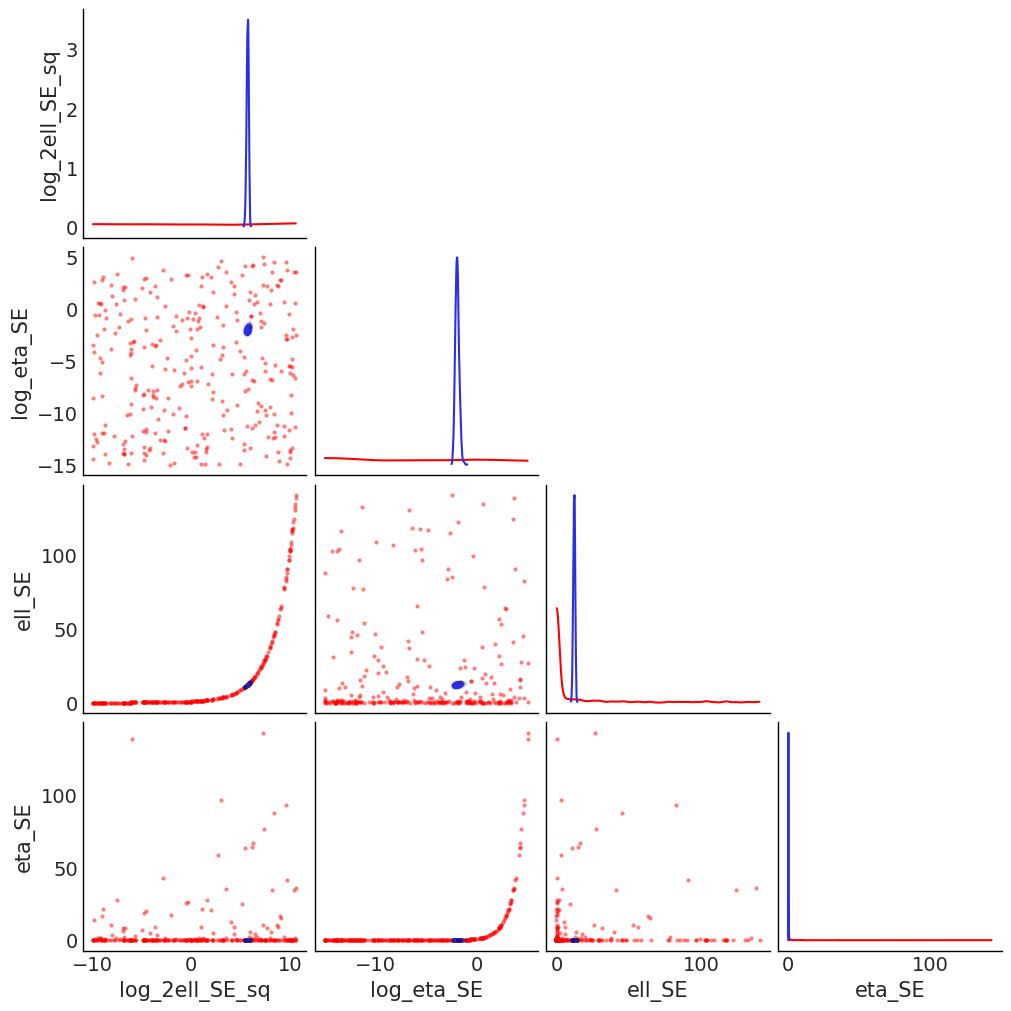

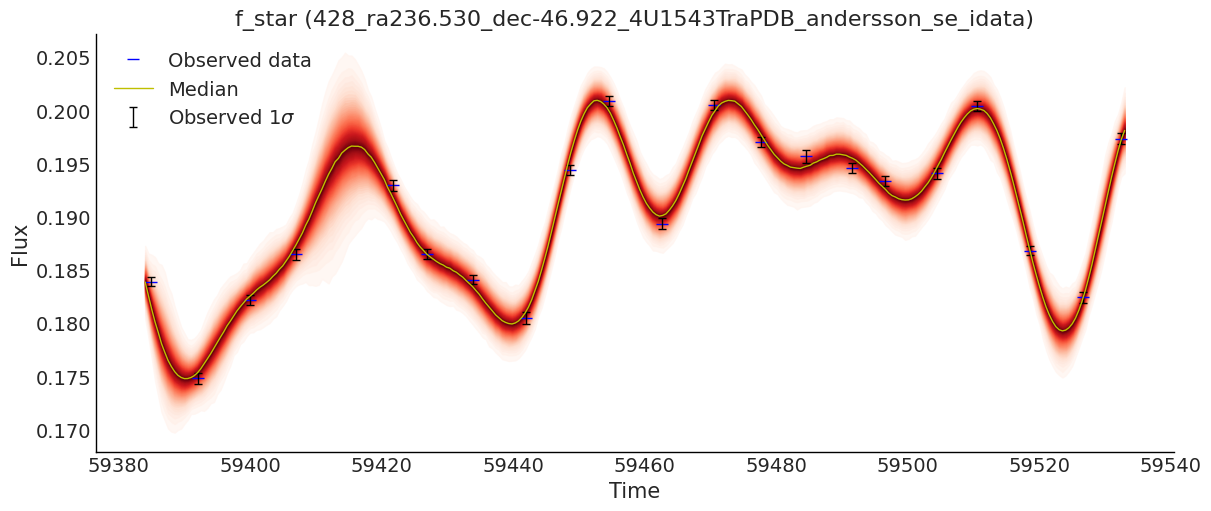

In [77]:
ufn.plot_traces(se_trace_path, variable_names)
ufn.plot_priorpost_cnr(se_trace_path, variable_names)
ufn.plot_postpred_samples(se_trace_path, csv_path)

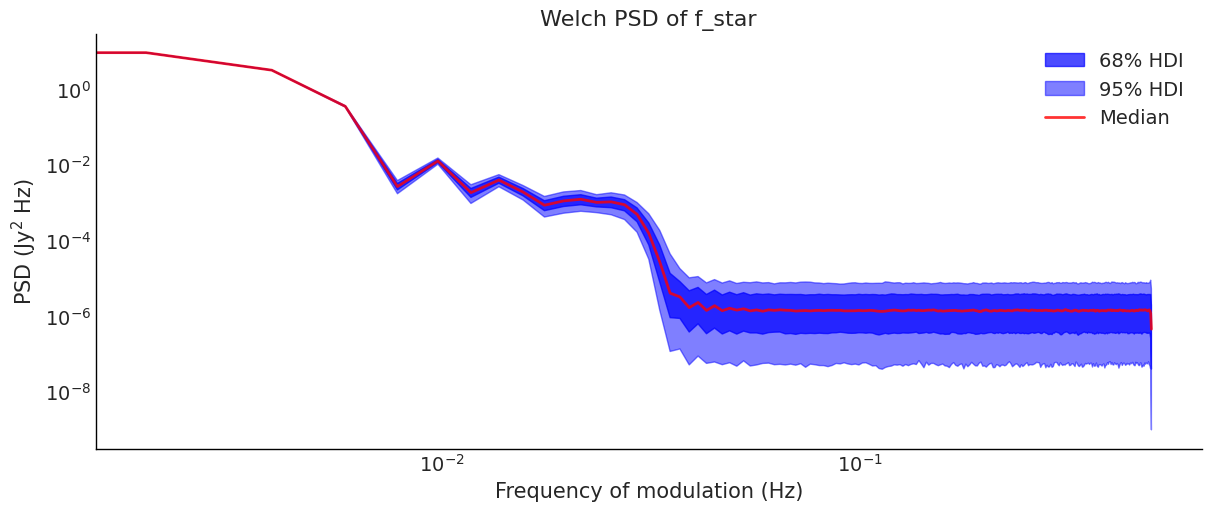

In [78]:
ufn.plot_welch_psd(se_trace);

## Matern $\frac{3}{2}$ Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{M}(\tau) =  \eta_\textrm{M}^2\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

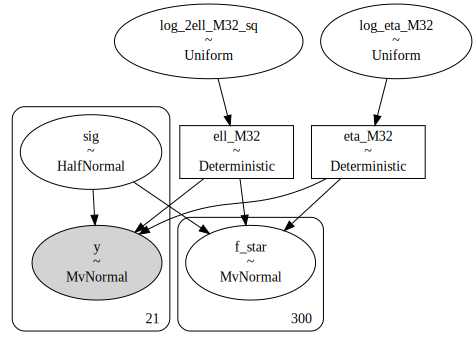

In [79]:
m32_trace_path = Path(f"traces/{csv_path.stem}_m32_idata.nc")
m32_dag_path = Path(f'dags/{csv_path.stem}_m32_dag.dot')

if m32_trace_path.is_file() and not OVERWRITE_TRACES:
    m32_trace = az.from_netcdf(m32_trace_path)
    m32_dag = gv.Source.from_file(m32_dag_path)
else:
    m32_trace, m32_dag = ufn.fit_m32_gp(csv_path, rng_seed=rng);
    az.to_netcdf(m32_trace, m32_trace_path)
    with open(m32_dag_path, 'w') as writehandle:
        writehandle.write(m32_dag.source)

gv.Source(m32_dag.source)

In [80]:
variable_names = ["log_2ell_M32_sq", "log_eta_M32", "ell_M32", "eta_M32"]
ufn.print_post_summary(m32_trace_path, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
log_2ell_M32_sq   9.832996   0.373007   9.297277   10.346017     0.015047   
log_eta_M32      -1.721904   0.243988  -2.063951   -1.358198     0.009791   
ell_M32          96.536796  17.715597  73.852140  124.765397     0.726549   
eta_M32           0.178726   0.042454   0.126951    0.257124     0.001749   

                  ess_median    ess_tail     r_hat       mean         sd  
log_2ell_M32_sq  2408.762955  1542.69115  1.002019   9.808707   0.491841  
log_eta_M32      2121.215562  2326.36308  1.003024  -1.713471   0.336530  
ell_M32          2408.762955  1542.69115  1.002252  98.219530  23.372174  
eta_M32          2121.215562  2326.36308  1.003878   0.190741   0.065439

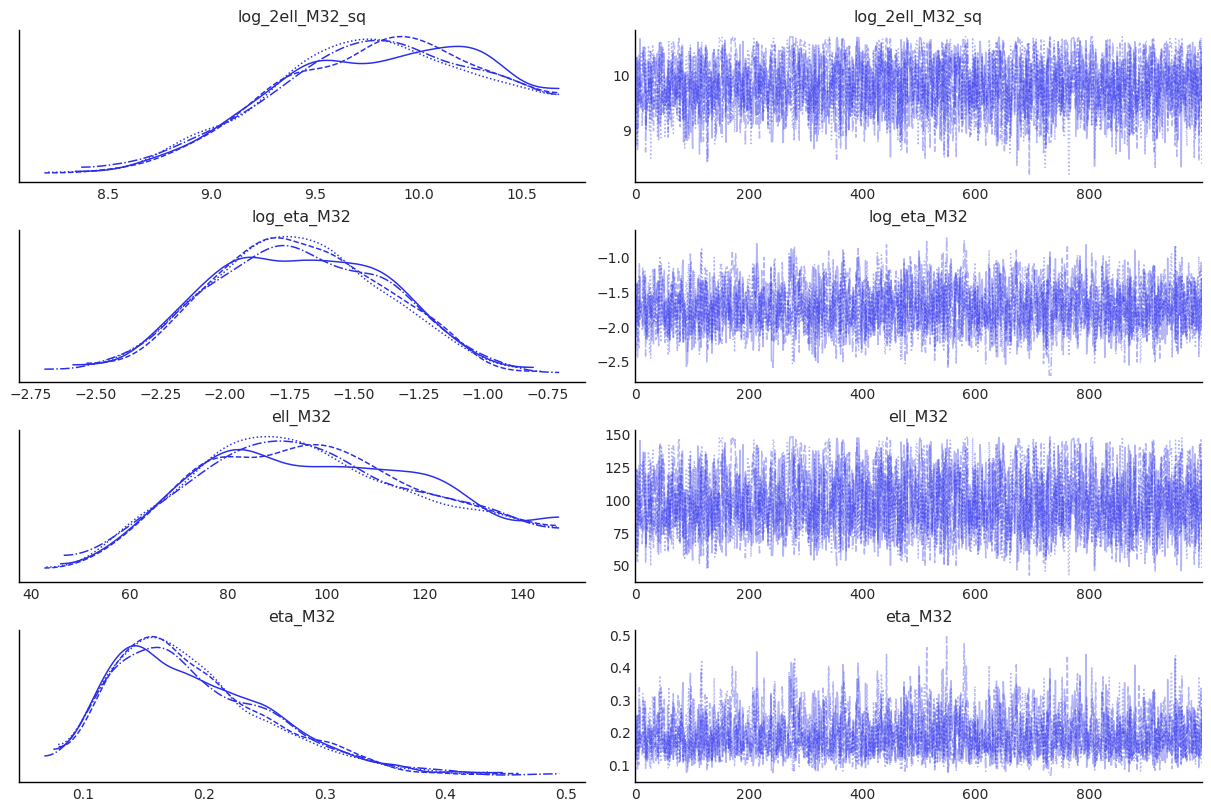

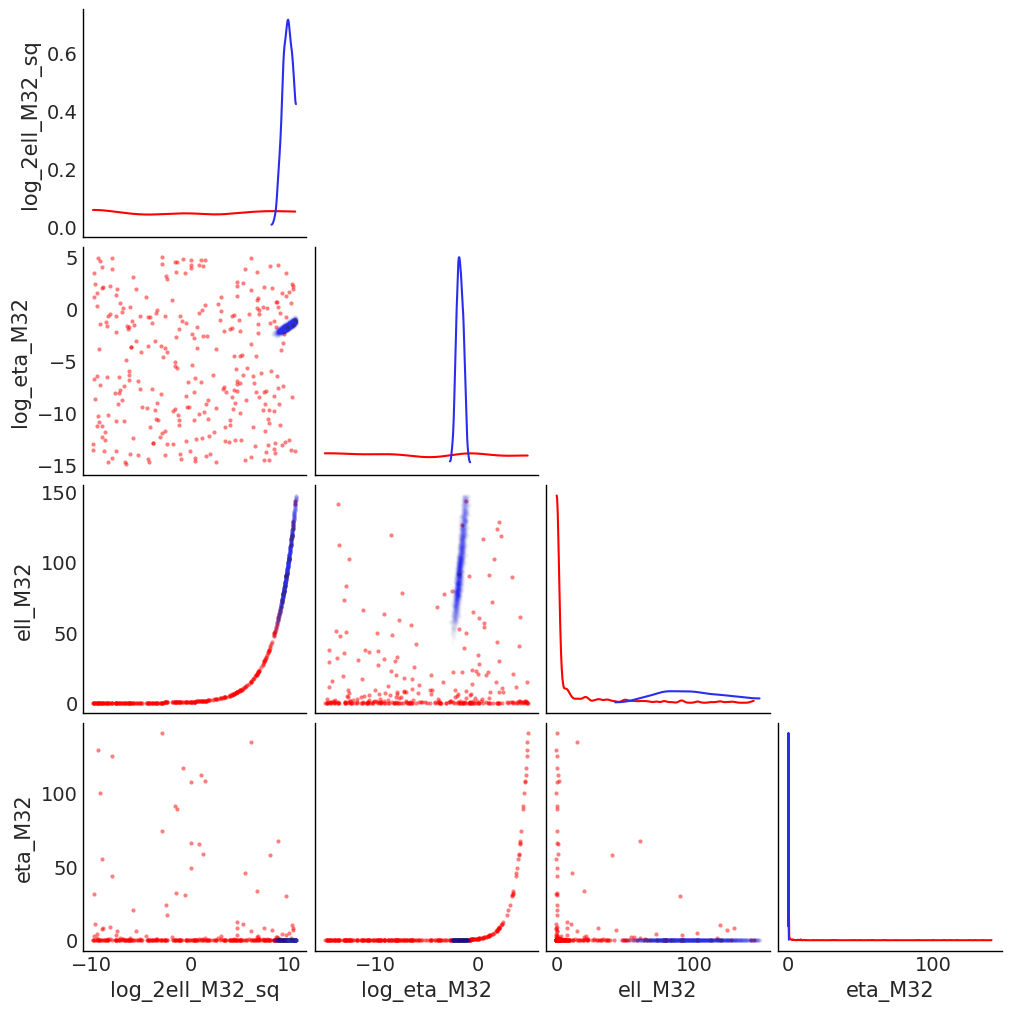

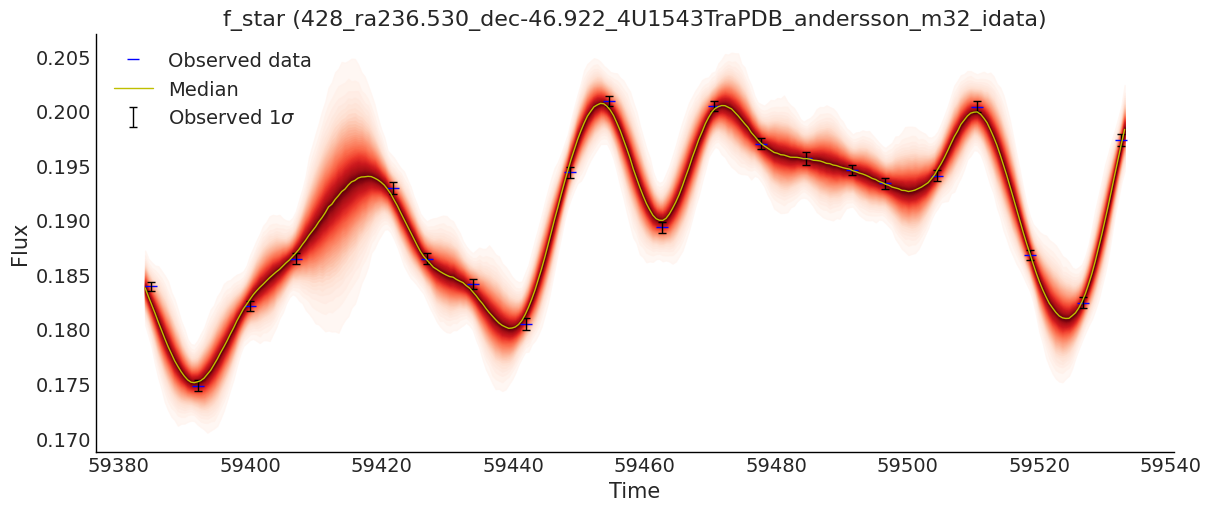

In [81]:
ufn.plot_traces(m32_trace_path, variable_names)
ufn.plot_priorpost_cnr(m32_trace_path, variable_names)
ufn.plot_postpred_samples(m32_trace_path, csv_path)

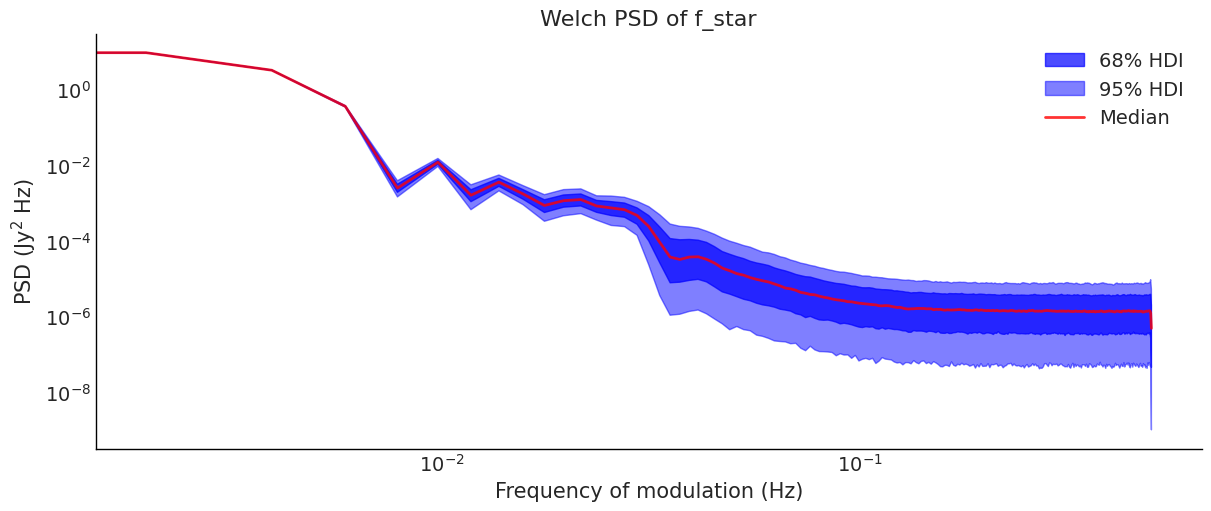

In [82]:
ufn.plot_welch_psd(m32_trace);

## SE + Matern $\frac{3}{2}$ additive kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta^2 \left[ \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} + \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\} \right]$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

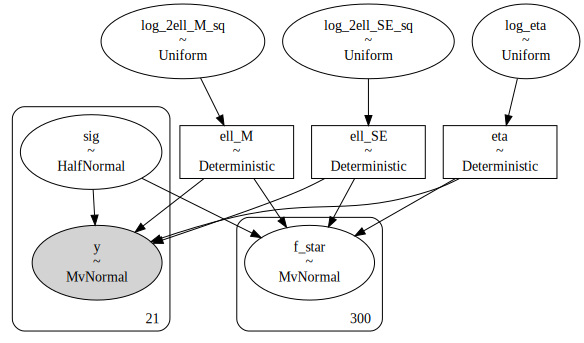

In [83]:
sem32_trace_path = Path(f"traces/{csv_path.stem}_se+m32_idata.nc")
sem32_dag_path = Path(f'dags/{csv_path.stem}_se+m32_dag.dot')

if sem32_trace_path.is_file() and not OVERWRITE_TRACES:
    sem32_trace = az.from_netcdf(sem32_trace_path)
    sem32_dag = gv.Source.from_file(sem32_dag_path)
else:
    sem32_trace, sem32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(sem32_trace, sem32_trace_path)
    with open(sem32_dag_path, 'w') as writehandle:
        writehandle.write(sem32_dag.source)

gv.Source(sem32_dag.source)

In [84]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta"]
ufn.print_post_summary(sem32_trace_path, variable_names)

median       mad   eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  9.898424  0.482680  9.012765  10.462231     0.017789   
log_2ell_M_sq   9.220003  0.443502  8.598046   9.906818     0.018257   
log_eta        -2.145377  0.288678 -2.528962  -1.671672     0.011883   

                 ess_median     ess_tail     r_hat      mean        sd  
log_2ell_SE_sq  3346.653667  1380.982291  1.000790  9.746386  0.704752  
log_2ell_M_sq   2388.901601  1021.337083  1.002488  9.236705  0.628546  
log_eta         2223.152800  1350.250218  1.002065 -2.111058  0.413508

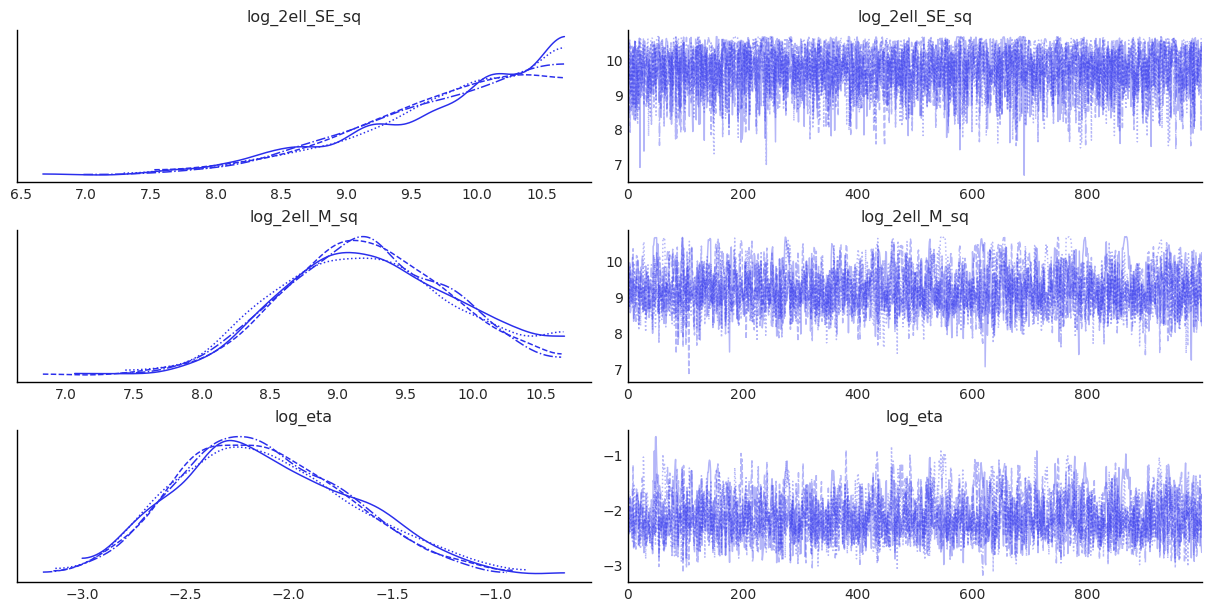

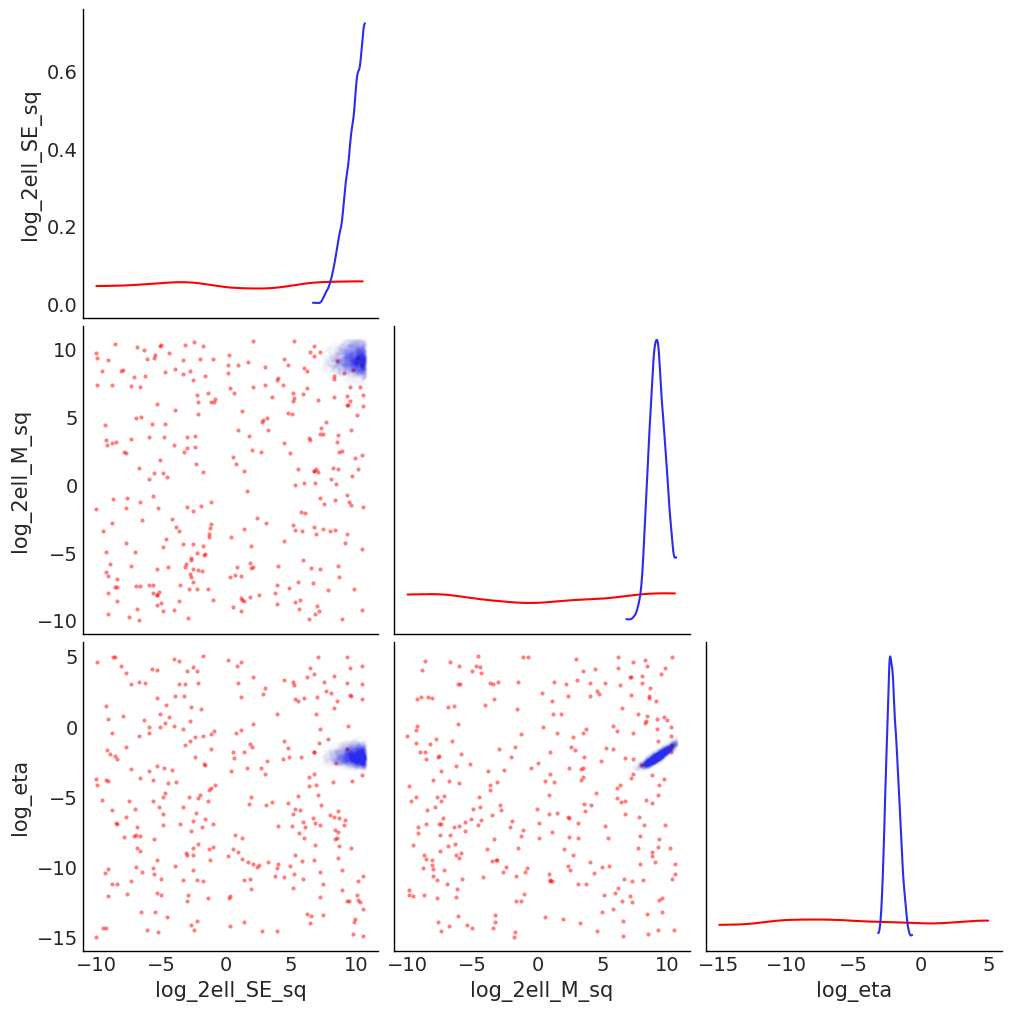

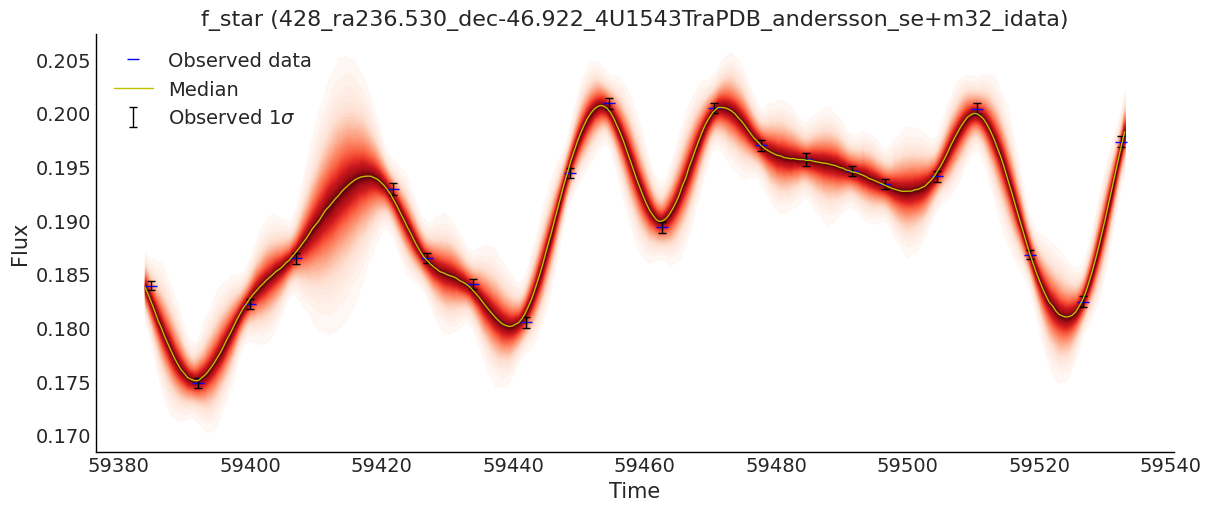

In [85]:
ufn.plot_traces(sem32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sem32_trace_path, variable_names)
ufn.plot_postpred_samples(sem32_trace_path, csv_path)

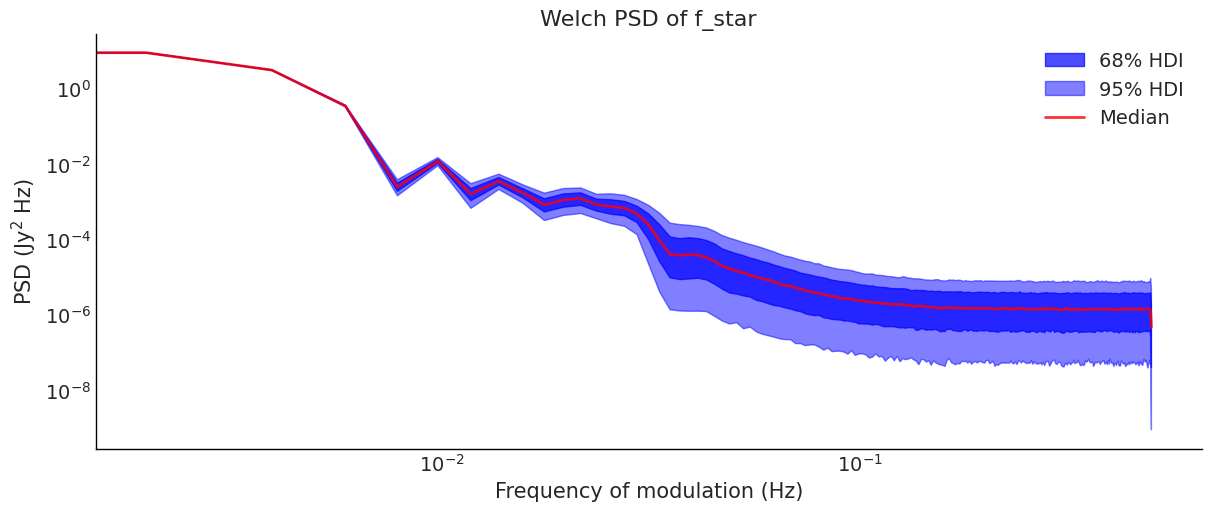

In [86]:
ufn.plot_welch_psd(sem32_trace);

## SE GP + Matern $\frac{3}{2}$ GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{M}(\tau) = \eta^2_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

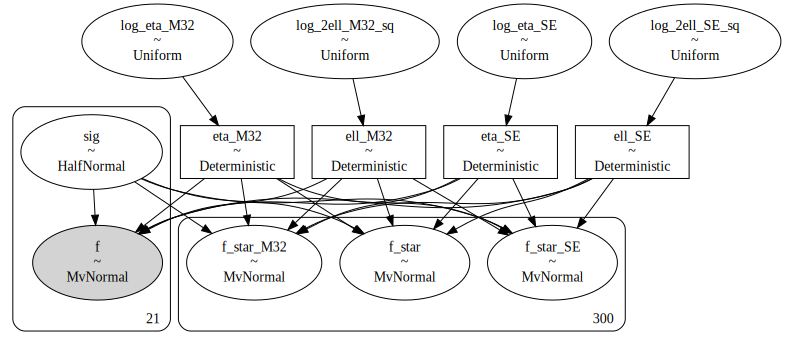

In [87]:
gpSE_gpM32_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpM32_idata.nc")
gpSE_gpM32_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpM32_dag.dot')

if gpSE_gpM32_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpM32_trace = az.from_netcdf(gpSE_gpM32_trace_path)
    gpSE_gpM32_dag = gv.Source.from_file(gpSE_gpM32_dag_path)
else:
    gpSE_gpM32_trace, gpSE_gpM32_dag = ufn.fit_gpSE_gpM32(csv_path, rng_seed=rng);
    az.to_netcdf(gpSE_gpM32_trace, gpSE_gpM32_trace_path)
    with open(gpSE_gpM32_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpM32_dag.source)

gv.Source(gpSE_gpM32_dag.source)

In [98]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M32_sq", "log_eta_SE", "log_eta_M32", "ell_SE", "ell_M32"]
ufn.print_post_summary(gpSE_gpM32_trace_path, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
log_2ell_SE_sq    10.415151   0.176005   10.043002   10.610904     0.006583   
log_2ell_M32_sq   -2.823844   3.639967   -7.682444    2.092014     0.136203   
log_eta_SE        -2.055455   0.252058   -2.396674   -1.636794     0.009608   
log_eta_M32       -5.141935   0.124076   -5.313461   -4.945373     0.003919   
ell_SE           129.153524  11.588418  107.224760  142.433971     0.425124   
ell_M32            0.172304   0.163439    0.015180    2.012614     0.011711   

                  ess_median     ess_tail     r_hat        mean         sd  
log_2ell_SE_sq   2756.167278  1585.281673  1.001590   10.328368   0.316494  
log_2ell_M32_sq  2441.661878  1319.036445  1.001963   -2.746163   4.230619  
log_eta_SE       2822.068628  1758.777028  1.001212   -2.013275   0.400982  
log_eta_M32      3777.143456  1146.235889  1.000158   -5.127995   0.193727  
ell_SE           2756.167278  1585.281673  1.001590  125.112192  17.782646  
ell_M32          2441.661878  1319.036445  1.000967    1.002161   1.811549

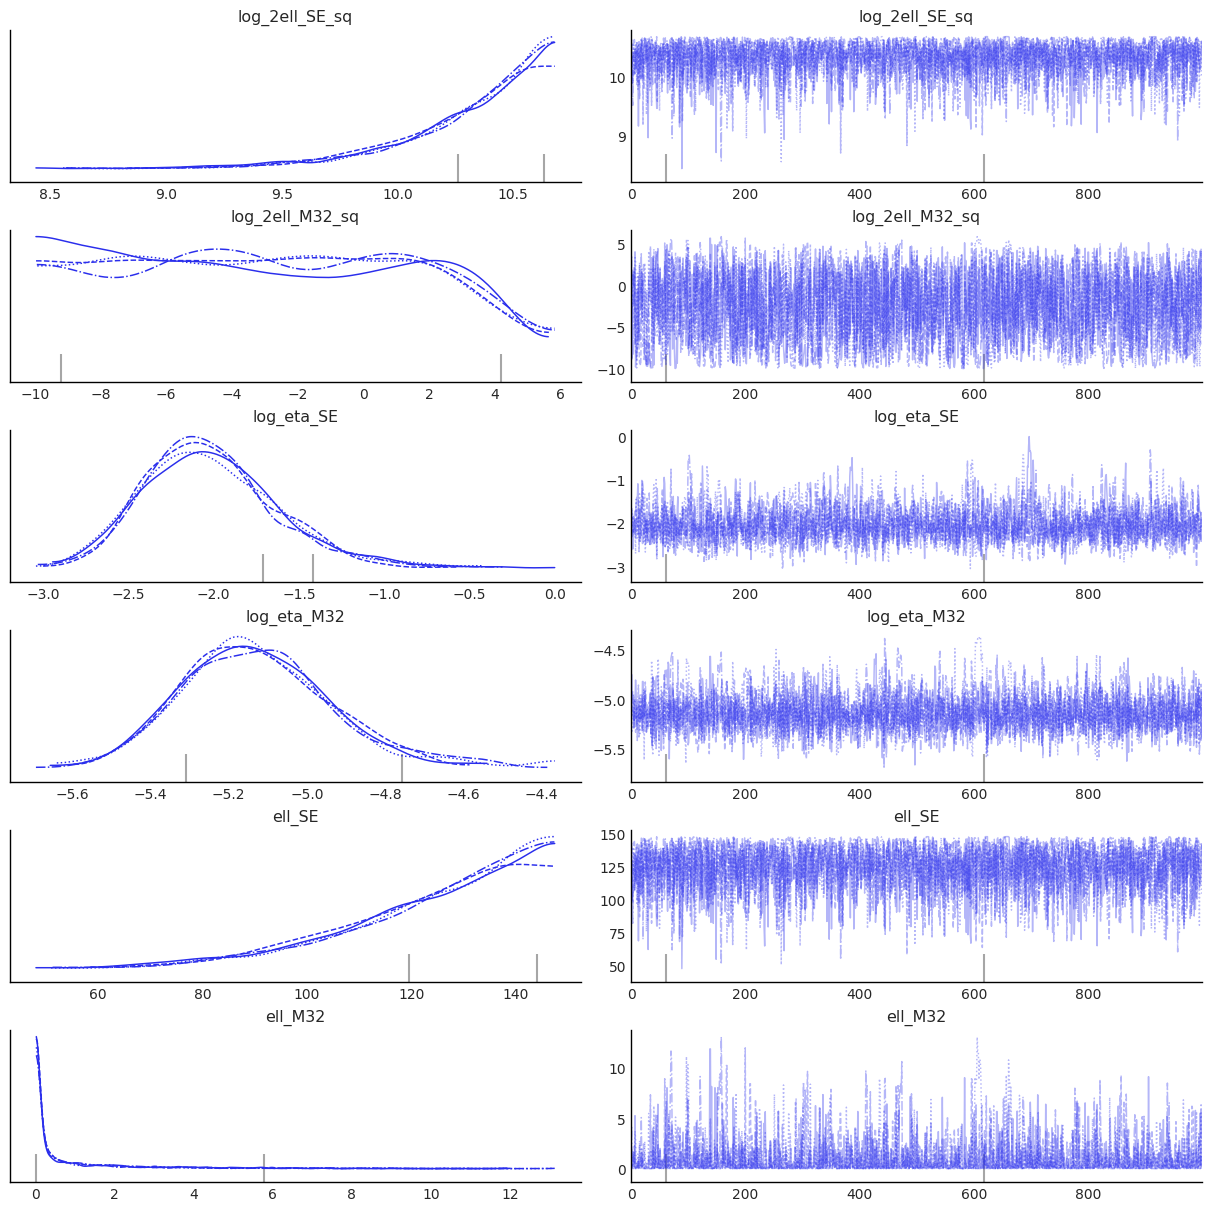

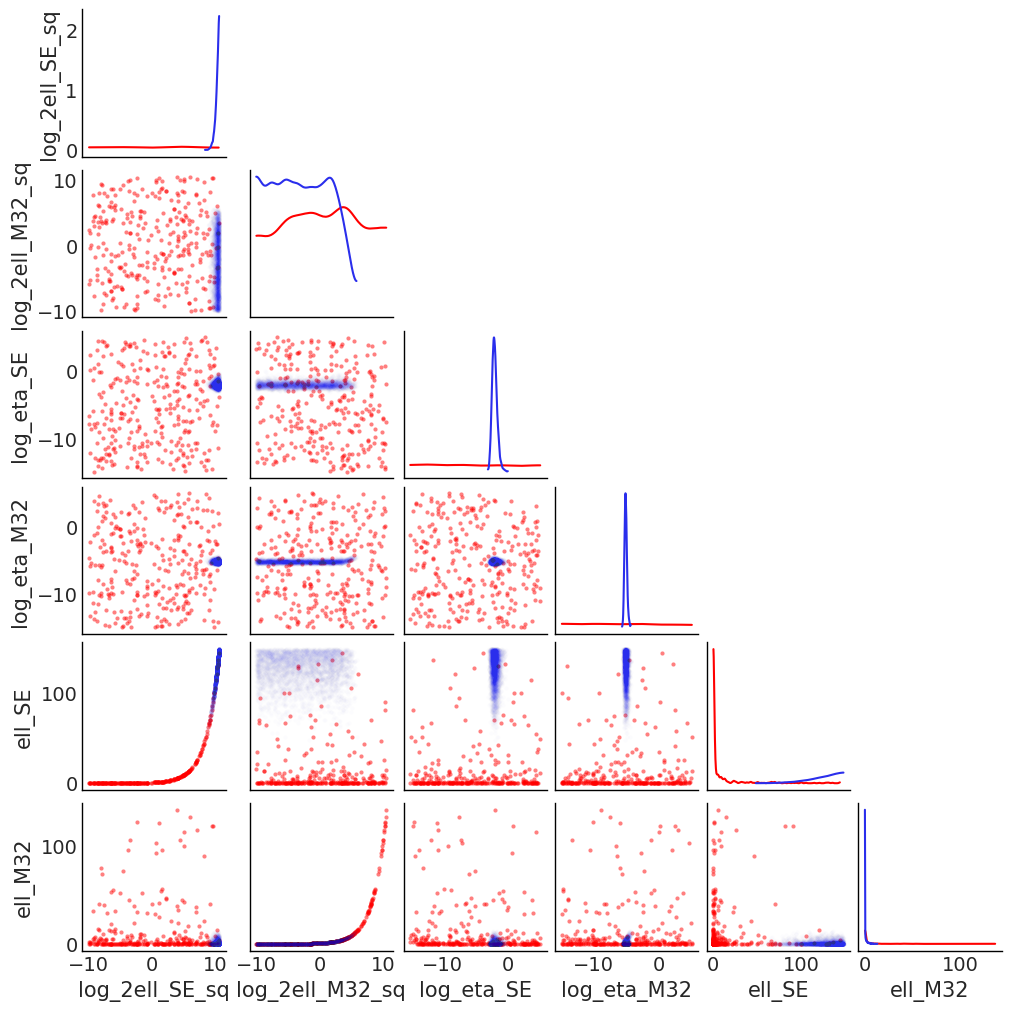

In [99]:
ufn.plot_traces(gpSE_gpM32_trace_path, variable_names)
ufn.plot_priorpost_cnr(gpSE_gpM32_trace_path, variable_names)

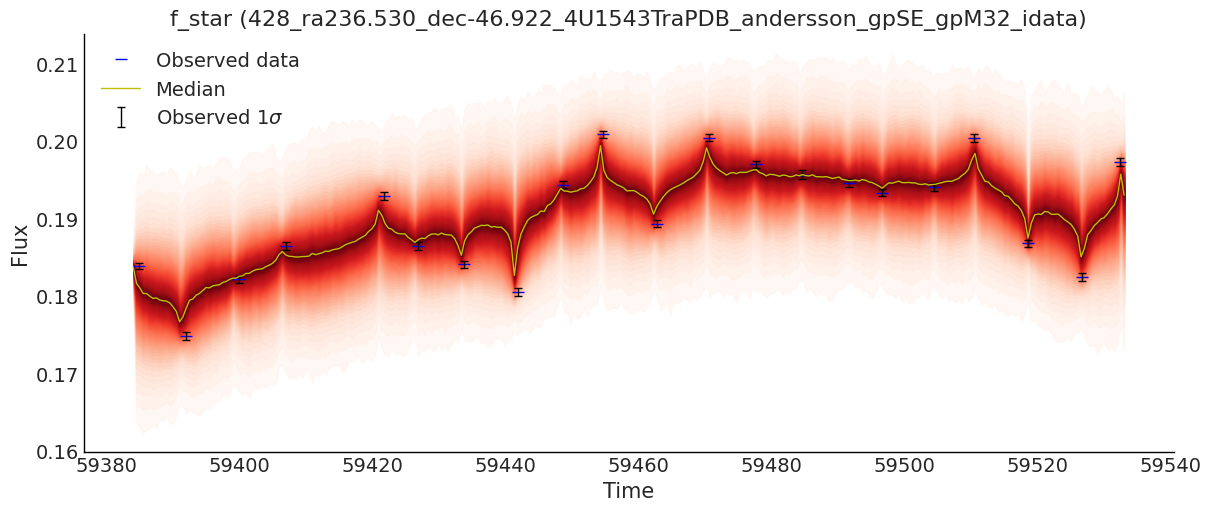

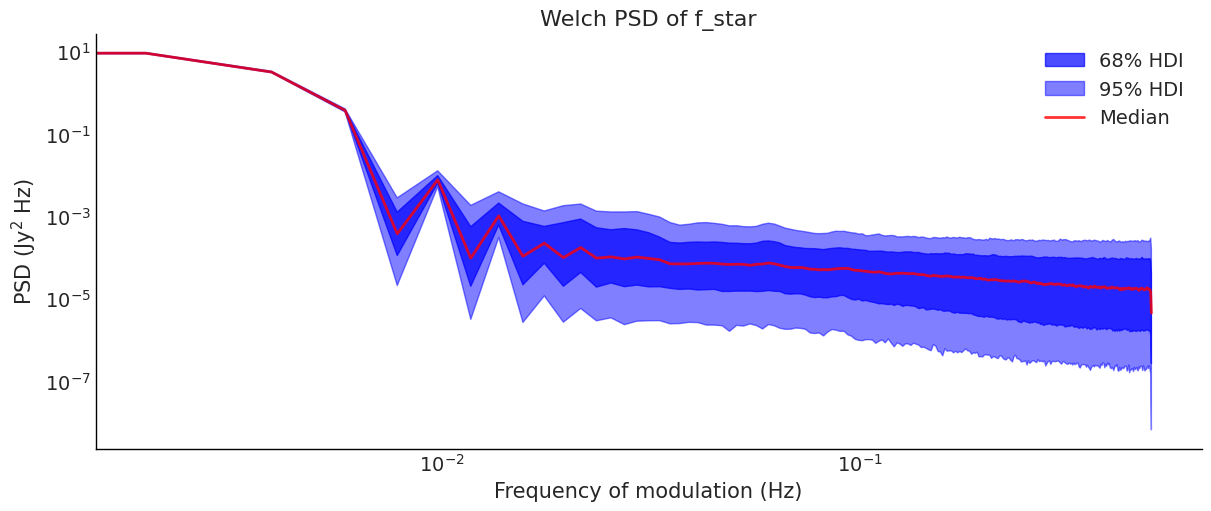

In [102]:
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path, "f_star")
ufn.plot_welch_psd(gpSE_gpM32_trace, "f_star");

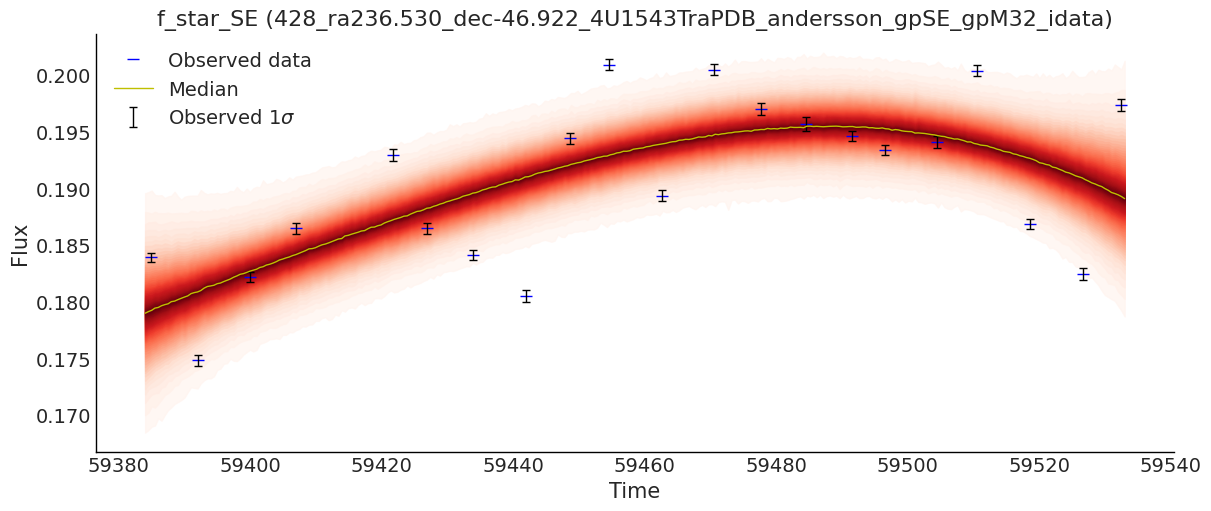

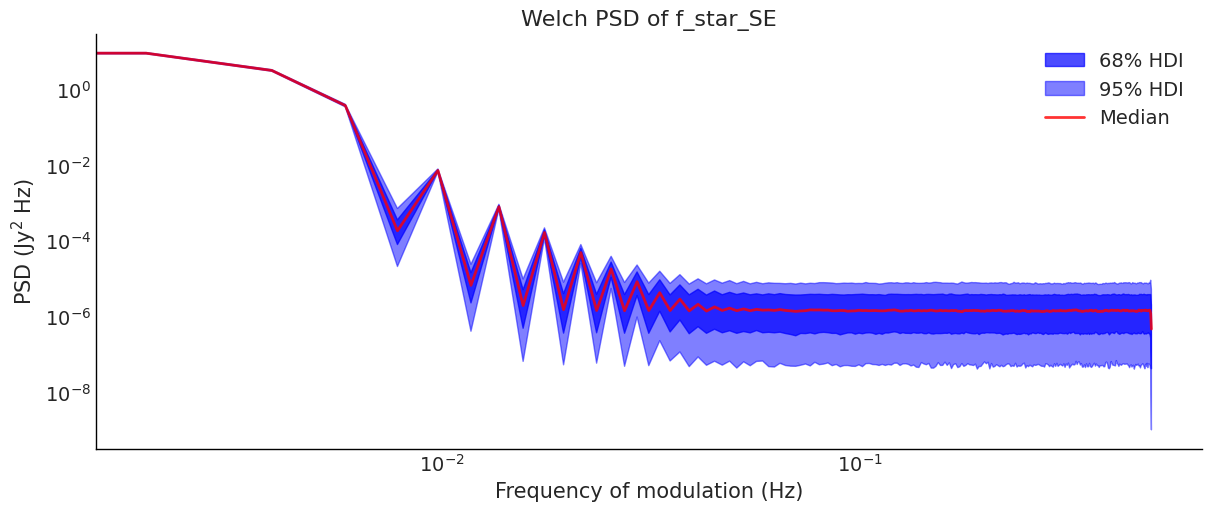

In [103]:
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path, "f_star_SE")
ufn.plot_welch_psd(gpSE_gpM32_trace, "f_star_SE");

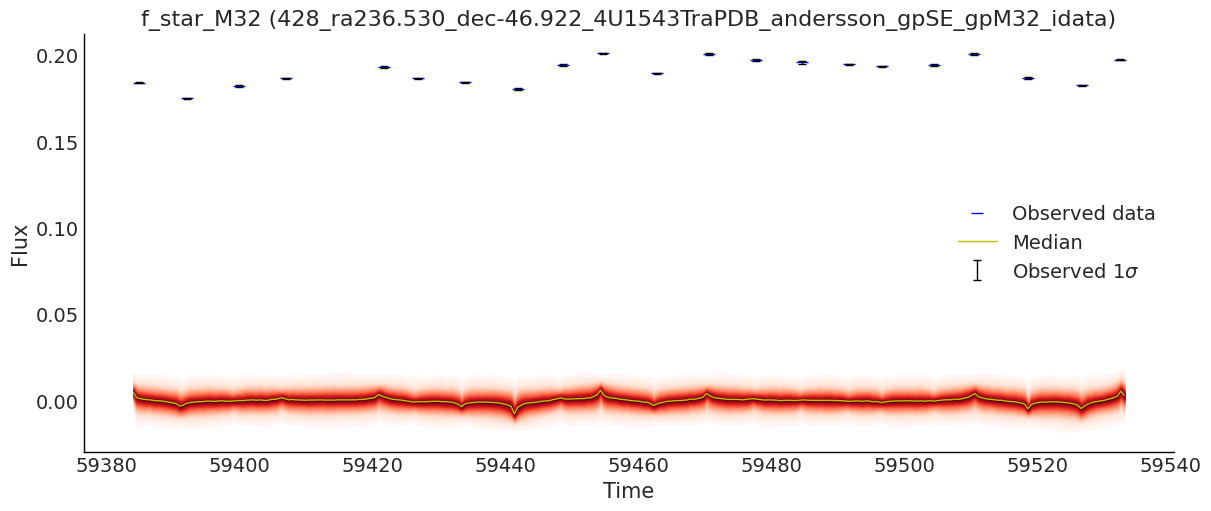

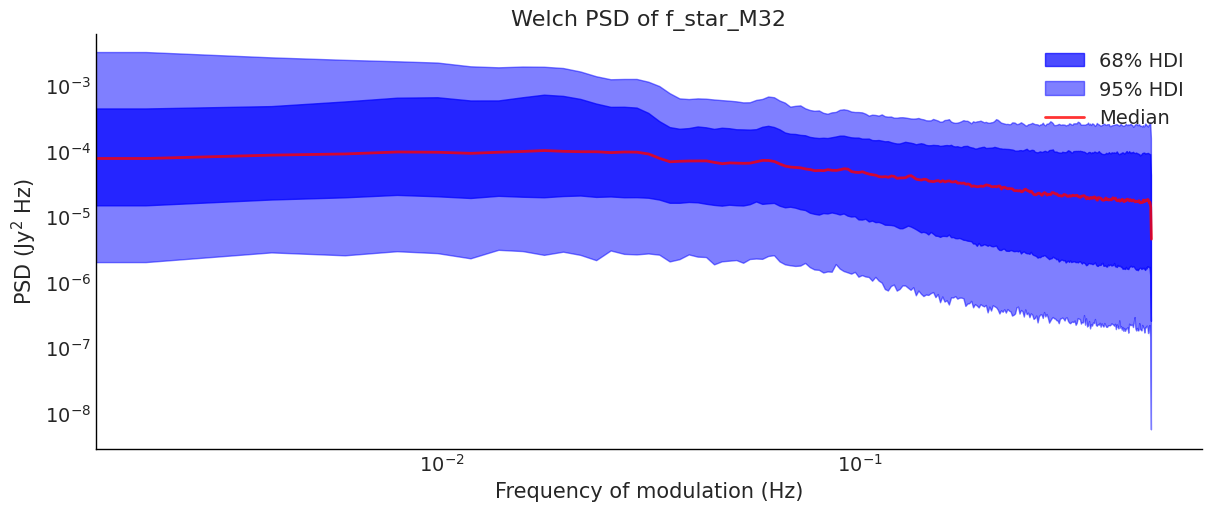

In [104]:
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path, "f_star_M32")
ufn.plot_welch_psd(gpSE_gpM32_trace, "f_star_M32");

## SE $\times$ Matern $\frac{3}{2}$ Multiplicative Kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\mathrm{SE \times M}(\tau))$$

$$k_\mathrm{SE \times M}(\tau) = \eta^2\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta \sim \mathcal{U}[-15, 5]$$


$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

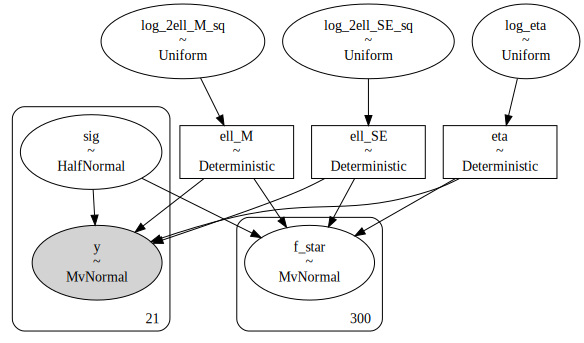

In [91]:
sexm32_trace_path = Path(f"traces/{csv_path.stem}_sexm32_idata.nc")
sexm32_dag_path = Path(f'dags/{csv_path.stem}_sexm32_dag.dot')

if sexm32_trace_path.is_file() and not OVERWRITE_TRACES:
    sexm32_trace = az.from_netcdf(sexm32_trace_path)
    sexm32_dag = gv.Source.from_file(sexm32_dag_path)
else:
    sexm32_trace, sexm32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=True, rng_seed=rng);
    az.to_netcdf(sexm32_trace, sexm32_trace_path)
    with open(sexm32_dag_path, 'w') as writehandle:
        writehandle.write(sexm32_dag.source)

gv.Source(sexm32_dag.source)

In [92]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta"]
ufn.print_post_summary(sexm32_trace_path, variable_names)

median       mad   eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  10.010935  0.411536  9.249212  10.489819     0.013719   
log_2ell_M_sq    9.785483  0.362093  9.248888  10.296438     0.017710   
log_eta         -1.740387  0.243979 -2.075376  -1.383479     0.010882   

                 ess_median     ess_tail     r_hat      mean        sd  
log_2ell_SE_sq  2545.545563  1351.182856  1.001519  9.880214  0.610759  
log_2ell_M_sq   2234.620172  1718.643141  1.002614  9.764423  0.494631  
log_eta         2112.012654  1731.279229  1.003469 -1.732640  0.332429

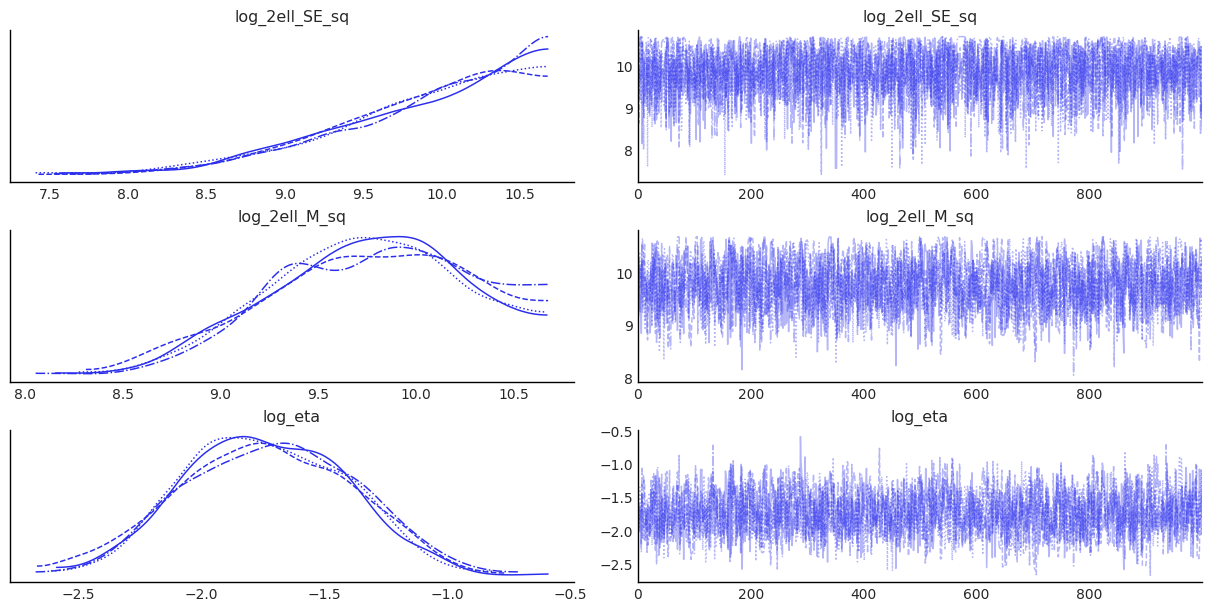

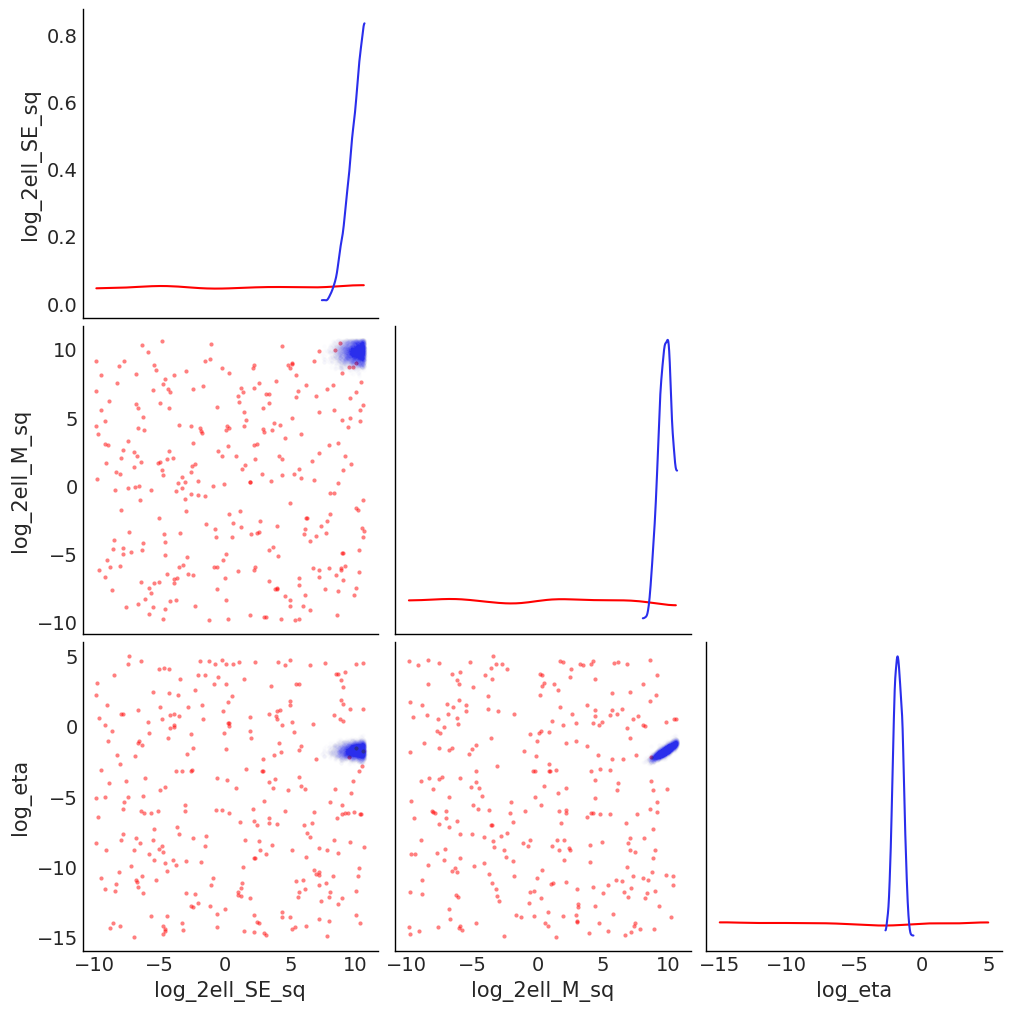

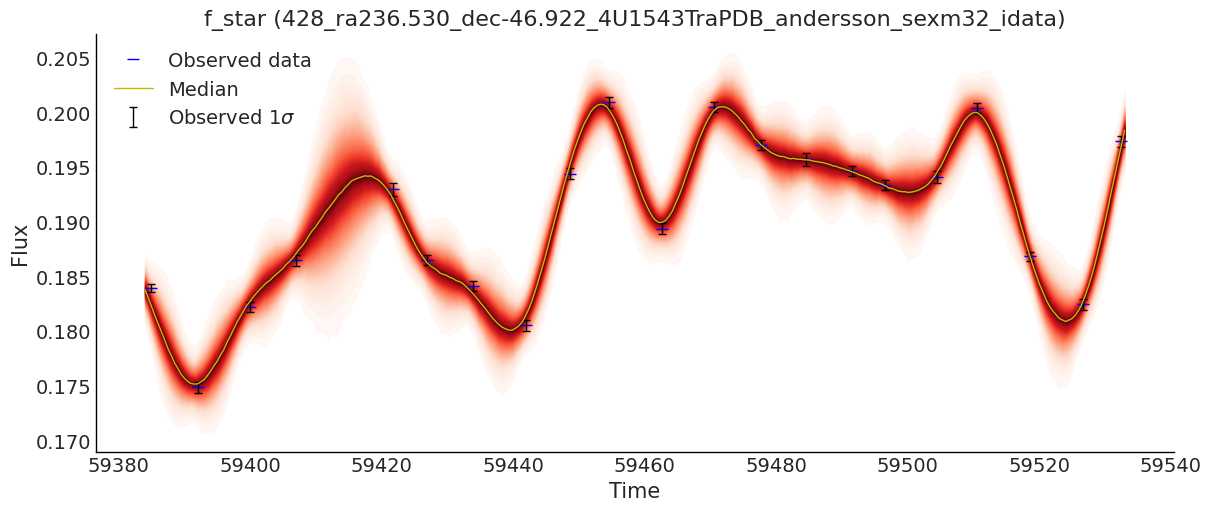

In [93]:
ufn.plot_traces(sexm32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sexm32_trace_path, variable_names)
ufn.plot_postpred_samples(sexm32_trace_path, csv_path)

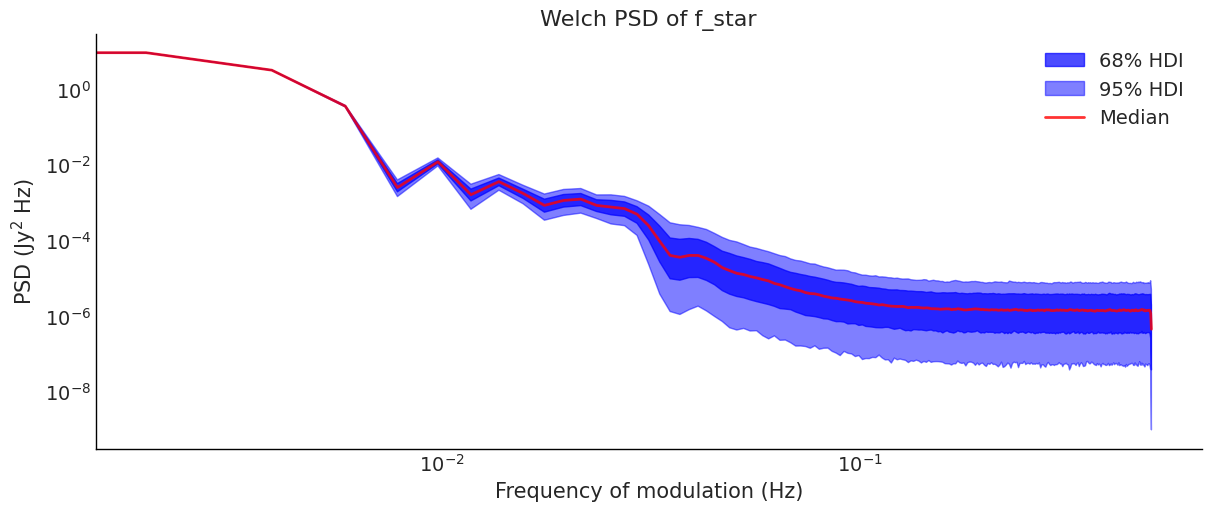

In [94]:
ufn.plot_welch_psd(sexm32_trace);